In [1]:
# I imported more than I used...in case we need at some point~
import os
import zipfile
import urllib2
import urllib
import json
from cStringIO import StringIO

import pandas as pd
import numpy as np

import geopandas as gpd
from geopandas import GeoDataFrame
import pysal as ps
from fiona.crs import from_epsg
import shapely
from shapely.geometry import Point, Polygon

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
path_ct2010 = "Datasets/ct_nyc_shape"
ct_nyc_shape = gpd.read_file(path_ct2010)
SNAP = pd.read_csv("Datasets/SNAP/ACS_09-14.csv", low_memory=False)
SNAP = SNAP.rename(columns={'id': 'Id'})
SNAP_ct = ct_nyc_shape.merge(SNAP, on = "Id", how = "inner")

In [6]:
SNAP_1 = pd.DataFrame(SNAP_ct[["HC02_EST_VC01", "BoroName", "Year"]])

In [8]:
import pandasql as ps

In [9]:
q = 'select BoroName, Year, sum(HC02_EST_VC01) as TotalFoodStamp from SNAP_1 group by BoroName, Year'

SNAP_2 = ps.sqldf(q, globals())

In [18]:
SNAP_2.to_csv("year_sum.csv")

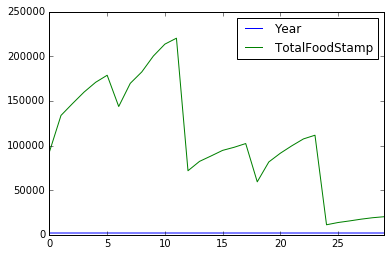

In [17]:
SNAP_2.plot()